### Peer_graded Assignment_TimeSeries
##### By Yan Li
##### Date: 01/09/2022

### Part I: Load libraries, Read data and do EDA

I'll use a dataset provided by the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities) that measures hourly air quality in Chinese cities/city districts<sup>1</sup>.

1. Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220â€“10236

In [5]:
### Load Libraries and modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lifelines
import keras
import tensorflow as tf
import sklearn


os.chdir('C:\Study\IBMMachineLearning\CoursePythonCode')

In [29]:
### Load the data and do EDA
df=  pd.read_csv('.\FiveCitiesPM\Shanghai.csv')
print(df.shape)
df.head()

(52584, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [30]:
### EDA_missing values
df.isna().sum()

No                   0
year                 0
month                0
day                  0
hour                 0
season               0
PM_Jingan        27884
PM_US Post       18545
PM_Xuhui         27395
DEWP                13
HUMI                13
PRES                28
TEMP                13
cbwd                12
Iws                 12
precipitation     4009
Iprec             4009
dtype: int64

In [22]:
df.year.value_counts()

2012    8784
2010    8760
2011    8760
2013    8760
2014    8760
2015    8760
Name: year, dtype: int64

In [31]:
### fill the na by interpolate()
df['PM_Jingan'] = df['PM_Jingan'].interpolate()
df.PM_Jingan.isna().sum()

26304

In [32]:
### To keep work easier, just use one year data
df = df[df.year == 2015]
df.shape

(8760, 17)

In [34]:
### check missing for new df
df.PM_Jingan.isna().sum()

0

In [38]:
### create data column from the data
from datetime import datetime
def make_date(row):
    return datetime(year = row['year'], month = row['month'], day = row['day'], hour = row['hour'])
df['date'] = df.apply(make_date,axis=1)
df.set_index(df.date,inplace=True)
df.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,date
date,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,43825,2015,1,1,0,4,27.666667,32.0,29.0,-12.0,34.56,1033.0,2.0,NW,11.0,0.0,0.0,2015-01-01 00:00:00
2015-01-01 01:00:00,43826,2015,1,1,1,4,30.333333,40.0,29.0,-11.0,40.24,1033.0,1.0,NW,15.0,0.0,0.0,2015-01-01 01:00:00
2015-01-01 02:00:00,43827,2015,1,1,2,4,33.000000,37.0,41.0,-11.0,40.24,1033.0,1.0,NW,20.0,0.0,0.0,2015-01-01 02:00:00
2015-01-01 03:00:00,43828,2015,1,1,3,4,39.000000,44.0,46.0,-11.0,40.24,1033.0,1.0,NW,24.0,0.0,0.0,2015-01-01 03:00:00
2015-01-01 04:00:00,43829,2015,1,1,4,4,38.000000,38.0,38.0,-11.0,43.26,1033.0,0.0,NW,29.0,0.0,0.0,2015-01-01 04:00:00


<AxesSubplot:xlabel='date'>

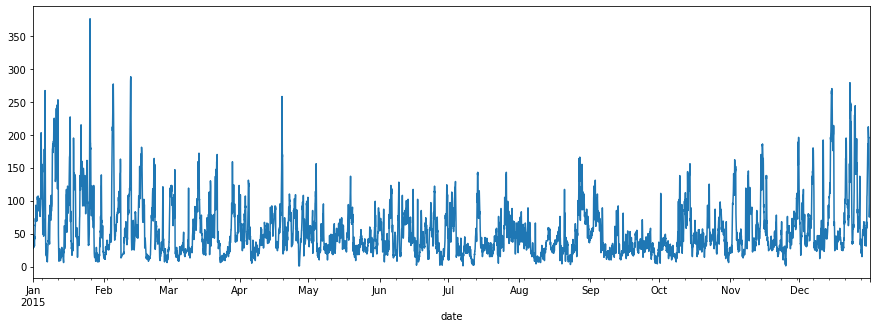

In [39]:
### plot the series
plt.figure(figsize = (15,5))
df.PM_Jingan.plot()

There are some periodic things, let take a closer look:

<AxesSubplot:xlabel='date'>

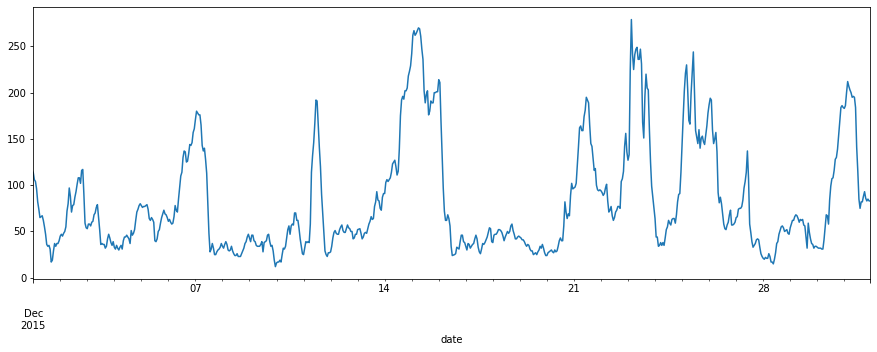

In [42]:
plt.figure(figsize=(15,5))
df.PM_Jingan[-31*24:].plot()

### Part II Time Series Model

In [45]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=8760)

C:\Users\saffr\AppData\Local\Temp/ipykernel_1440/269861021.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True);


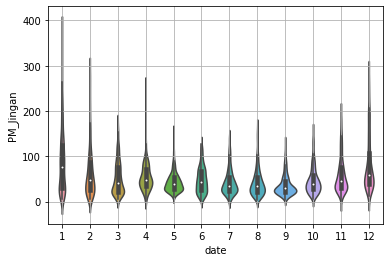

In [46]:
### First is to check stationary

# run violinplot to check mean and variance change virtually
sns.violinplot(x=df.index.month, y=df.PM_Jingan)
plt.grid(b=True);

C:\Users\saffr\AppData\Local\Temp/ipykernel_1440/1088107056.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True);


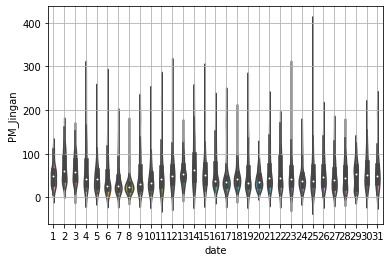

In [47]:
sns.violinplot(x=df.index.day, y=df.PM_Jingan)
plt.grid(b=True);

The mean and variance do fluntuate but not too bad.

In [50]:
### Run Adjusted Dickey_Fuller test
import statsmodels.tsa.stattools as ts
dftest = ts.adfuller(df.PM_Jingan)
dftest

(-14.69812595396744,
 2.9759812588979775e-27,
 3,
 8756,
 {'1%': -3.4310970555186726,
  '5%': -2.861870148935175,
  '10%': -2.566945733303859},
 61495.75219595039)

The p value is the second value 2.9*e^-27. So from ADF test,we can reject the null hypothesis of having unite root, thus series is stationary.

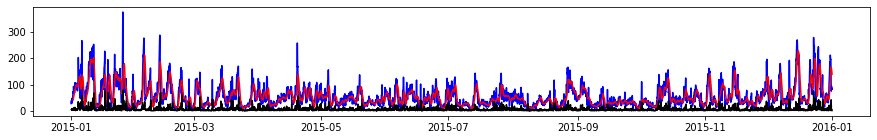

In [62]:
### using rolling statistics see if they changed over time
timeseries = df.PM_Jingan
rollingmean = timeseries.rolling(window = 24).mean() ### every 24hr 
rollingstd = timeseries.rolling(window = 4).std()

plt.figure(figsize = (15,2))
plt.plot(timeseries, color = 'blue', label = 'original series')
plt.plot(rollingmean, color = 'red', label = 'rolling mean')
plt.plot(rollingstd, color = 'black', label = 'rolling std')

Not very clear to see the move, let's zoom to last month data

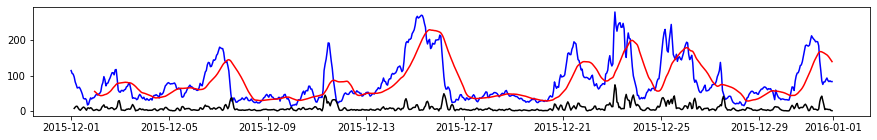

In [63]:
timeseries = df.PM_Jingan[-24*31:]

rollingmean = timeseries.rolling(window = 24).mean() ### every 24hr 
rollingstd = timeseries.rolling(window = 4).std()

plt.figure(figsize = (15,2))
plt.plot(timeseries, color = 'blue', label = 'original series')
plt.plot(rollingmean, color = 'red', label = 'rolling mean')
plt.plot(rollingstd, color = 'black', label = 'rolling std')

Now we can see there are some up and downs locally. Actually from here, we should directly go to try LSTM. BUt in order to comparison, we'll try regular time series models first.

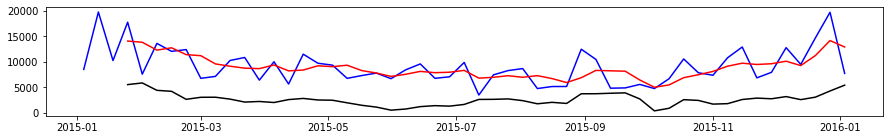

In [64]:
### check to see the weekly data 
timeseries = df.PM_Jingan.resample('W').sum()
#timeseries = df.PM_Jingan
rollingmean = timeseries.rolling(window = 4).mean() ### every 24hr 
rollingstd = timeseries.rolling(window = 4).std()

plt.figure(figsize = (15,2))
plt.plot(timeseries, color = 'blue', label = 'original series')
plt.plot(rollingmean, color = 'red', label = 'rolling mean')
plt.plot(rollingstd, color = 'black', label = 'rolling std')

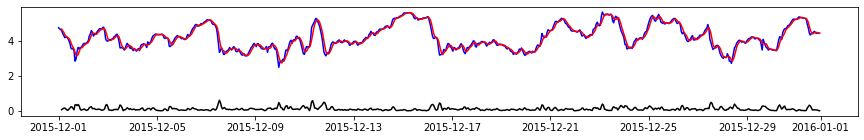

In [66]:
timeseries = np.log(df.PM_Jingan[-24*31:])
rollingmean = timeseries.rolling(window = 4).mean() ### every 24hr 
rollingstd = timeseries.rolling(window = 4).std()

plt.figure(figsize = (15,2))
plt.plot(timeseries, color = 'blue', label = 'original series')
plt.plot(rollingmean, color = 'red', label = 'rolling mean')
plt.plot(rollingstd, color = 'black', label = 'rolling std')

log transfermation smooth out the curve.

In [67]:
df['log_PM_Jingan'] = np.log(df.PM_Jingan)

In [68]:
df.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,date,log_PM_Jingan
date,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,43825,2015,1,1,0,4,27.666667,32.0,29.0,-12.0,34.56,1033.0,2.0,NW,11.0,0.0,0.0,2015-01-01 00:00:00,3.320228
2015-01-01 01:00:00,43826,2015,1,1,1,4,30.333333,40.0,29.0,-11.0,40.24,1033.0,1.0,NW,15.0,0.0,0.0,2015-01-01 01:00:00,3.412247
2015-01-01 02:00:00,43827,2015,1,1,2,4,33.000000,37.0,41.0,-11.0,40.24,1033.0,1.0,NW,20.0,0.0,0.0,2015-01-01 02:00:00,3.496508
2015-01-01 03:00:00,43828,2015,1,1,3,4,39.000000,44.0,46.0,-11.0,40.24,1033.0,1.0,NW,24.0,0.0,0.0,2015-01-01 03:00:00,3.663562
2015-01-01 04:00:00,43829,2015,1,1,4,4,38.000000,38.0,38.0,-11.0,43.26,1033.0,0.0,NW,29.0,0.0,0.0,2015-01-01 04:00:00,3.637586


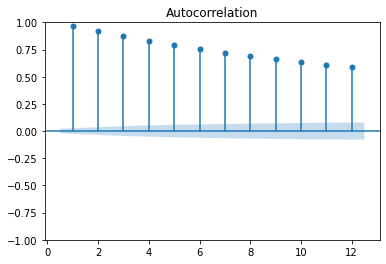

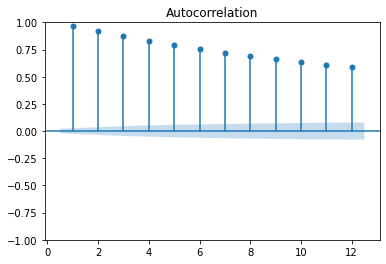

In [77]:
### Run ACF and PACF to determine the parameters in SARMA
import statsmodels.api as sm

sm.tsa.graphics.plot_acf(df.log_PM_Jingan, lags=12, zero=False)


c:\study\envpy38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


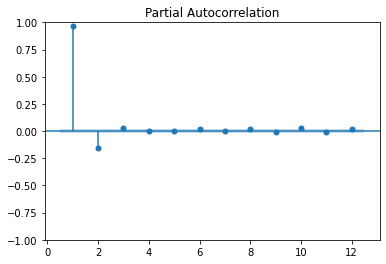

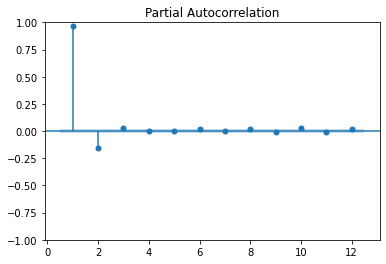

In [78]:
sm.tsa.graphics.plot_pacf(df.log_PM_Jingan, lags=12, zero = False)

According to Box_Jenkins Method chart, the ACF is not decay to zero means the series is not stationary. We need a stationary series to apply SARMA model. The we check montly data and log transform it and found it has staionary acf.

### [Box-Jenkins Method](https://en.wikipedia.org/wiki/Box–Jenkins_method)

ACF Shape|Indicated Model
---|---
Exponential, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model.
Alternating positive and negative, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to help identify the order.
One or more spikes, rest are essentially zero|Moving average model, order identified by where plot becomes zero.
Decay, starting after a few lags|Mixed autoregressive and moving average (ARMA) model.
All zero or close to zero|Data are essentially random.
High values at fixed intervals|Include seasonal autoregressive term.
No decay to zero|Series is not stationary.

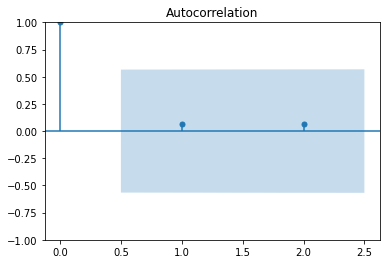

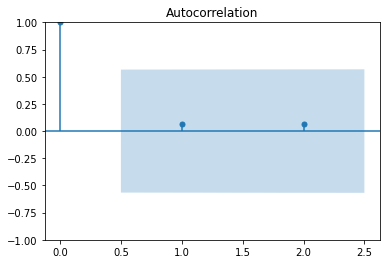

In [90]:
### Now goback to check monthly data, whose acf decays to zero 
timeseries1 = df.log_PM_Jingan.resample('M').sum()
sm.tsa.graphics.plot_acf(timeseries1, lags = 2)

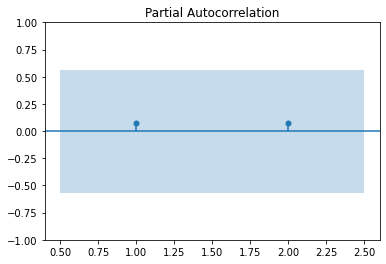

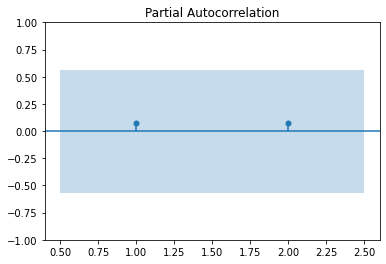

In [92]:
sm.tsa.graphics.plot_pacf(timeseries1, lags=2, zero = False)

The current df only has one year data or 12 point, whcih is too less. We add two more years to have more data points.

In [93]:
df2=  pd.read_csv('.\FiveCitiesPM\Shanghai.csv')

df2['PM_Jingan'] = df2['PM_Jingan'].interpolate()

df2['log_PM_Jingan'] = np.log(df2.PM_Jingan)
df2['date'] = df2.apply(make_date,axis=1)
df2.set_index(df2.date,inplace=True)
df2 = df2[df2.year >=2013]

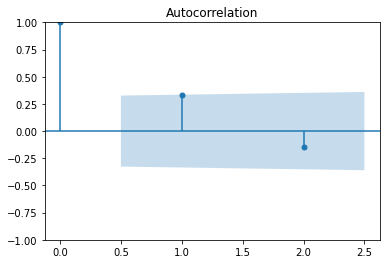

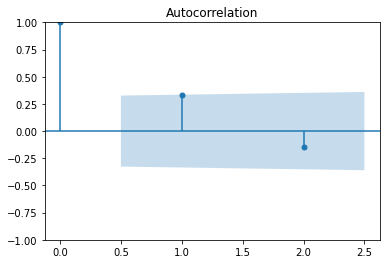

In [94]:
timeseries = df2.log_PM_Jingan.resample('M').sum()
sm.tsa.graphics.plot_acf(timeseries, lags = 2)

Quickly check the rolling statistics and ADF test. Rolling mean and std is stable, ADF p value is not very low but it's under 0.05 so ok with it.

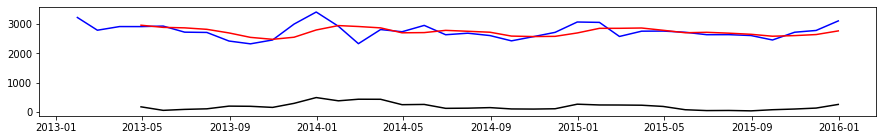

In [95]:
### rolling statistics:
#timeseries = np.log(df.PM_Jingan[-24*31:])
rollingmean = timeseries.rolling(window = 4).mean() ### every 24hr 
rollingstd = timeseries.rolling(window = 4).std()

plt.figure(figsize = (15,2))
plt.plot(timeseries, color = 'blue', label = 'original series')
plt.plot(rollingmean, color = 'red', label = 'rolling mean')
plt.plot(rollingstd, color = 'black', label = 'rolling std')

In [96]:
dftest = ts.adfuller(timeseries)
dftest

(-3.4105202204091225,
 0.010605423519412873,
 9,
 26,
 {'1%': -3.7112123008648155,
  '5%': -2.981246804733728,
  '10%': -2.6300945562130176},
 341.88452595194053)

Since this is not an ideal SARMA thing so use auto arima to get parameter.

In [100]:
#from pyramid.arima import auto_arima
import pmdarima as pm
stepwise_model = pm.auto_arima(timeseries, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=494.444, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=501.076, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=494.569, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=674.769, Time=0.01 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=496.367, Time=0.11 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=503.022, Time=0.02 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,1)[12]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,1)[12] intercept
Total fit time: 1.275 seconds
494.44359364967886


Use the parameter find from the auto arima and run diagnostics

In [107]:
sar = sm.tsa.statespace.SARIMAX(timeseries, 
                                order=(0,0,0), 
                                seasonal_order=(0,0,1,12), 
                                trend='c').fit()

c:\study\envpy38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


c:\study\envpy38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


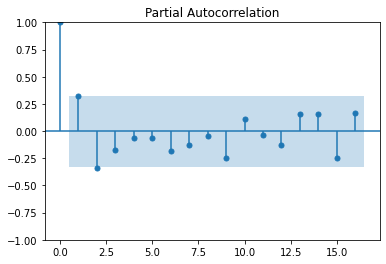

In [108]:
sm.tsa.graphics.plot_pacf(sar.resid[sar.loglikelihood_burn:]);

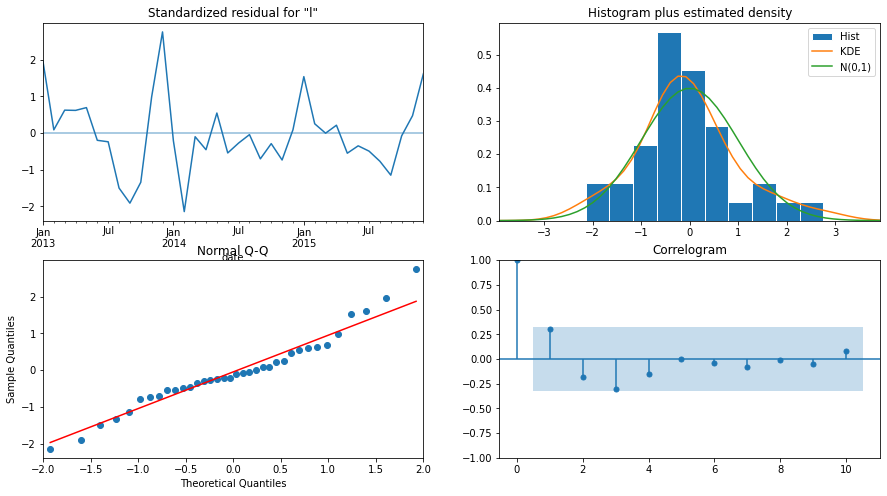

In [118]:
sar.plot_diagnostics(figsize = (15,8));

IT's not bad based on the diagnostics.NO do some predictions.

In [119]:
sar.forecast(steps  = 12 )

2016-01-31    2951.344177
2016-02-29    2801.138058
2016-03-31    2771.152518
2016-04-30    2796.515003
2016-05-31    2707.371960
2016-06-30    2730.875304
2016-07-31    2713.930349
2016-08-31    2681.568492
2016-09-30    2637.390481
2016-10-31    2762.704248
2016-11-30    2826.890762
2016-12-31    2960.691240
Freq: M, Name: predicted_mean, dtype: float64

In [120]:
def cross_validate(series,horizon,start,step_size,order = (1,0,0),seasonal_order = (0,0,0,0),trend=None):
    '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (seris): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
    fcst = []
    actual = []
    date = []
    for i in range(start,len(series)-horizon,step_size):
        model = sm.tsa.statespace.SARIMAX(series[:i+1], #only using data through to and including start 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                trend=trend).fit()
        fcst.append(model.forecast(steps = horizon)[-1]) #forecasting horizon steps into the future
        actual.append(series[i+horizon]) # comparing that to actual value at that point
        date.append(series.index[i+horizon]) # saving date of that value
    return pd.DataFrame({'fcst':fcst,'actual':actual},index=date)

In [121]:
len(timeseries)

36

In [151]:
import warnings
warnings.filterwarnings("ignore")
series = timeseries
horizon = 12
start = 20
step_size = 1
order = (0,0,0)
seasonal_order = (0,0,1,12)

cv1 = cross_validate(timeseries,12,12,1,
                    order = order,
                    seasonal_order = seasonal_order)

In [152]:
cv1

,fcst,actual
2015-01-31,876.082172,3058.213766
2015-02-28,625.438247,2579.216836
2015-03-31,903.898965,2758.996268
2015-04-30,854.788359,2762.697367
2015-05-31,992.918661,2721.917701
2015-06-30,850.142014,2639.097286
2015-07-31,888.032433,2640.434977
2015-08-31,931.751797,2610.540798
2015-09-30,843.799856,2459.079692
2015-10-31,896.123871,2723.007213


<AxesSubplot:>

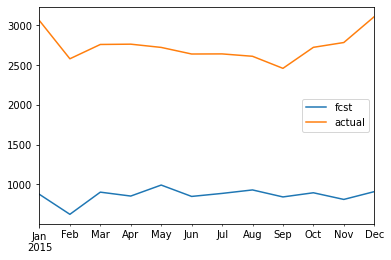

In [153]:
cv1.plot()

There is not much data points, the predictions are too off.

### Part III Deep learning models: RNN and LSTM

In [157]:
#### make data keras format and split to train, test
#### we only use one year dtaa to keep things simple so df
df.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,date,log_PM_Jingan
date,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,43825,2015,1,1,0,4,27.666667,32.0,29.0,-12.0,34.56,1033.0,2.0,NW,11.0,0.0,0.0,2015-01-01 00:00:00,3.320228
2015-01-01 01:00:00,43826,2015,1,1,1,4,30.333333,40.0,29.0,-11.0,40.24,1033.0,1.0,NW,15.0,0.0,0.0,2015-01-01 01:00:00,3.412247
2015-01-01 02:00:00,43827,2015,1,1,2,4,33.000000,37.0,41.0,-11.0,40.24,1033.0,1.0,NW,20.0,0.0,0.0,2015-01-01 02:00:00,3.496508
2015-01-01 03:00:00,43828,2015,1,1,3,4,39.000000,44.0,46.0,-11.0,40.24,1033.0,1.0,NW,24.0,0.0,0.0,2015-01-01 03:00:00,3.663562
2015-01-01 04:00:00,43829,2015,1,1,4,4,38.000000,38.0,38.0,-11.0,43.26,1033.0,0.0,NW,29.0,0.0,0.0,2015-01-01 04:00:00,3.637586


In [159]:
def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of an hourly time series
    """
    
    return df[series_name][-(24*n_days):] 

def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

def get_train_test_data(df, series_name, series_days, input_hours, 
                        test_hours, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_hours (int): length of sequence input to network 
    test_hours (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    
    forecast_series = get_n_last_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_hours] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_hours:] # test data is the remaining test_hours

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap. 
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_hours, sample_gap): 
        train_X.append(train[i:i+input_hours]) # each training sample is of length input hours
        train_y.append(train[i+input_hours]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours] 
    test_y = test[input_hours:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

In [160]:
series_days = 56
input_hours = 12
test_hours = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'PM_Jingan', series_days, 
                         input_hours, test_hours))

In [161]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (436, 12, 1)
Training output shape: (436,)
Test input shape: (12,)
Test output shape: (12,)


In [164]:
# initialize model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout

def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

In [165]:
model = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

In [168]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_hours)  #predict range is going to be from end of X_init to length of test_hours
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

In [170]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


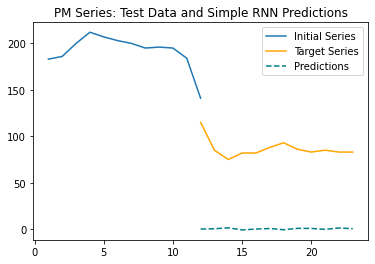

In [171]:
predict_and_plot(test_X_init, test_y, model,
                 'PM Series: Test Data and Simple RNN Predictions')

Try increase number of cell units and epochs. Notice the number of parameters increases.

In [207]:
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=2000)

In [191]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


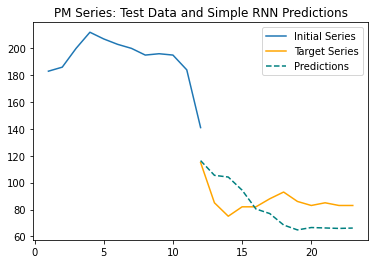

In [208]:
predict_and_plot(test_X_init, test_y, model,
                 'PM Series: Test Data and Simple RNN Predictions')

Now try LSTM.

In [196]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

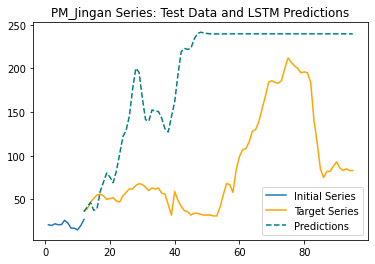

In [209]:
series_days = 50 
input_hours = 12
test_hours = 96

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'PM_Jingan', series_days, 
                         input_hours, test_hours))

model = fit_LSTM(train_X, train_y, cell_units=50, epochs=2000) 

predict_and_plot(test_X_init, test_y, model, 
                 'PM_Jingan Series: Test Data and LSTM Predictions')

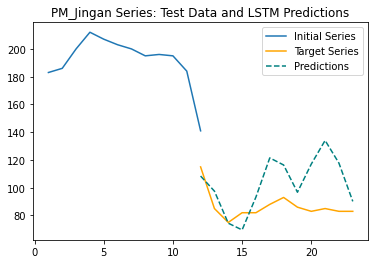

In [206]:
series_days = 56 
input_hours = 12
test_hours = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'PM_Jingan', series_days, 
                         input_hours, test_hours))

model = fit_LSTM(train_X, train_y, cell_units=50, epochs=2000) 

predict_and_plot(test_X_init, test_y, model, 
                 'PM_Jingan Series: Test Data and LSTM Predictions')

This data doesnot need survival analysis. The PM data has complex features not as simple pattern like trend, seasonality so the deep learning is better to capture these features and predict better results.By tuning the number of units and epochs, the fit may be better but also needs more time.